# Libs

In [286]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
from matplotlib.ticker import MultipleLocator
cmap_paired = matplotlib.cm.get_cmap('Paired')
import matplotlib.colors as mpc

# Load Dataframes

In [287]:
df_quic = pd.read_pickle(f"../data/pkl/df_quicreach_handshakes.pkl.zst")
df_quic.head()

,domain,rtt,sent_tls_payload,recv_tls_payload,handshake_tag,sent_udp_payload,recv_udp_payload,ampl_factor,initial_size
0,0-1xbet.best,8.486000,288,2656,Amplification,1220,5118,4.2,1200
1,0-1xbet.best,16.799999,288,2654,Amplification,1220,5116,4.2,1212
2,0-1xbet.best,23.701000,288,2656,Amplification,1222,5118,4.2,1222
3,0-1xbet.best,8.466000,288,2655,Amplification,1232,5117,4.2,1232
4,0-1xbet.best,10.727000,288,2656,Amplification,1242,5118,4.1,1242


In [288]:
df_tls = pd.read_pickle(f"../data/pkl/df_tls_certs.pkl.zst")
df_tls.head()

,domain,type,d,dt,certsize,tbssize,subjcn,subjhash,subjk,subjsize,...,sansize,sctcount,sctsize,extssize,sigalg,sigsize,validation,precert,ca,hash
0,0-1.ir,INTM,0,2,1380,1100,ISRG Root X1,281aea4e6a11200e3949b766237385489c2e8792,79b459e67bb6e5e40173800888c81a58f6e99b6e,81,...,0,0,0,248,SHA256-RSA,256,DV,False,True,6d99fb265eb1c5b3744765fcbc648f3cd8e1bffafdc4c2...
1,0-1.ir,INTM,1,2,1306,770,R3,48dac9a0fb2bd32d4ff0de68d2f567b735f9b3c4,142eb317b75856cbae500940e61faf9d8b14c2c6,52,...,0,0,0,177,SHA256-RSA,512,DV,False,True,67add1166b020ae61b8f5fc96813c04c2aa58996079686...
2,0-1.ir,LEAF,2,2,1315,1035,0-1.ir,54a78fa9554bdf23acf9f904cbf1f829a6e95693,259e6544d8a23a946330daab01dd4464028b85d7,19,...,22,2,246,484,SHA256-RSA,256,DV,False,False,7bec3730cd02e1f9be61e4db036f028c2d6d4a81d9480b...
3,0-11-0.com,LEAF,0,0,1288,1008,www.stackssl.com,21b145e103c2e1465e6c7e68de0c2f9b59a3501b,c1de76d0eb2484971f8e1657e26f5ae3388d0921,29,...,20,0,0,440,SHA256-RSA,256,DV,False,False,f9cc586e274a96227aa09eca83052843b76fca404faa3b...
4,0-1xbet.best,INTM,0,1,977,697,Cloudflare Inc ECC CA-3,12d78b402c356206fa827f8ed8922411b4acf504,a5ce37eaebb0750e946788b445fad9241087961f,76,...,0,0,0,273,SHA256-RSA,256,OV,False,True,3abbe63daf756c5016b6b85f52015fd8e8acbe277c5087...


In [289]:
df_qscanner = pd.read_pickle(f"../data/pkl/df_qscanner.pkl.zst")
df_qscanner.head()

,hostname,certificateHashes
0,slotv-online.xyz,9556295934cfe04c2505bbdbe8500a662c5b1056175893...
0,slotv-online.xyz,3abbe63daf756c5016b6b85f52015fd8e8acbe277c5087...
1,multilotto.com,c5afb3820d93b2dc12750c63a680ae76a63a1c46eec958...
1,multilotto.com,3abbe63daf756c5016b6b85f52015fd8e8acbe277c5087...
2,1xbet-new.ru,12571197245ee35dff7af19db47226ae5ef5d2ef04e6b8...


# Figure 5: Payload exchanged during Multi-RTT handshakes

In [290]:
best_initial = 1362
df_mrtt = df_quic[ (df_quic["initial_size"]==best_initial) &
                   (df_quic["handshake_tag"]=="Multi-RTT") ]
df_mrtt

,domain,rtt,sent_tls_payload,recv_tls_payload,handshake_tag,sent_udp_payload,recv_udp_payload,ampl_factor,initial_size
44,0-1xbet.club,25.754000,288,4533,Multi-RTT,2724,7097,2.6,1362
309,00000.la,25.209000,284,4520,Multi-RTT,2724,7084,2.6,1362
365,0009.in,35.715000,283,5170,Multi-RTT,2724,6606,2.4,1362
393,000webhost.com,12.395000,290,5097,Multi-RTT,2724,7712,2.8,1362
420,001bokep.com,8.504000,288,4534,Multi-RTT,2724,7098,2.6,1362
...,...,...,...,...,...,...,...,...,...
7593756,zzz64.top,15.680000,285,4717,Multi-RTT,2724,7281,2.7,1362
7593784,zzz65.top,8.499000,285,4525,Multi-RTT,2724,7089,2.6,1362
7593812,zzzagros.com,25.091999,288,4531,Multi-RTT,2724,7095,2.6,1362
7593868,zzztube.com,11.735000,287,4529,Multi-RTT,2724,7093,2.6,1362


In [291]:
tmp = df_mrtt.sort_values(by=["recv_udp_payload","recv_tls_payload"]).reset_index(drop=True)
tmp["Remaining QUIC Bytes"] = tmp["recv_udp_payload"] - tmp["recv_tls_payload"]
tmp["TLS Payload only"] = tmp["recv_tls_payload"]
tmp

,domain,rtt,sent_tls_payload,recv_tls_payload,handshake_tag,sent_udp_payload,recv_udp_payload,ampl_factor,initial_size,Remaining QUIC Bytes,TLS Payload only
0,www.deltadna.net,21.361000,292,3562,Multi-RTT,2724,3786,1.4,1362,224,3562
1,www.rakuten.co.uk,15.803000,293,3577,Multi-RTT,2724,3802,1.4,1362,225,3577
2,eu.fosters.com,19.836000,290,3295,Multi-RTT,2724,3880,1.4,1362,585,3295
3,www.enel.com,19.583000,288,3317,Multi-RTT,2724,3894,1.4,1362,577,3317
4,exixt.com,25.349001,285,2645,Multi-RTT,2724,3907,1.4,1362,1262,2645
...,...,...,...,...,...,...,...,...,...,...,...
104506,caliraisedled.com,11.362000,293,4537,Multi-RTT,27240,27450,1.0,1362,22913,4537
104507,www.thinoptics.com,11.454000,294,4539,Multi-RTT,25878,27452,1.1,1362,22913,4539
104508,www.staplepigeon.com,11.772000,296,4543,Multi-RTT,24516,27456,1.1,1362,22913,4543
104509,www.cleanhappens.com,11.214000,296,4544,Multi-RTT,25878,27457,1.1,1362,22913,4544


In [292]:
df_mrtt["recv_udp_payload"].max()

27461

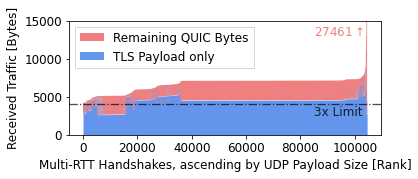

Caveat: PNG, PDF and Notebook version look slightly different. Can be fixed by zooming in.


In [295]:
ax = tmp[["TLS Payload only","Remaining QUIC Bytes"]].plot.area(
            color=["cornflowerblue","lightcoral"],
            figsize=(8*0.7,3*0.7), linewidth=0.01)

ax.axhline(best_initial*3, c="black", linestyle="-.", alpha=0.7, linewidth=1.3)
ax.text(85000, 2500, "3x Limit", c="black", alpha=0.8)
ax.text(85000, 13000, r"27461$\uparrow$", c="lightcoral")

ax.set_xlabel(f"Multi-RTT Handshakes, ascending by UDP Payload Size [Rank]")
ax.set_ylabel("Received Traffic [Bytes]")
ax.yaxis.set_minor_locator(MultipleLocator(5000))
ax.set_ylim(0,15000)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc="upper left",
          ncol=1, fancybox=False, shadow=False,)

fig = ax.get_figure()
fig.savefig(f"./plots/area_multipe_rtt_udp_tls_bytes.pdf", bbox_inches='tight')
fig.savefig(f"./plots/area_multipe_rtt_udp_tls_bytes.png", bbox_inches='tight', dpi=200)
plt.show()
plt.close(fig)

print("Caveat: PNG, PDF and Notebook version look slightly different. Can be fixed by zooming in.")

In [294]:
# how often does the TLS payload alone exceed the 3x limit?
(tmp["TLS Payload only"]>best_initial*3).value_counts(normalize=True)*100

True     87.615658
False    12.384342
Name: TLS Payload only, dtype: float64

# Figure 6: Distribution of certificate sizes grouped by QUIC support

In [218]:
df_tls["certsize_total"] = df_tls.groupby(["domain"])["certsize"].transform("sum")

In [219]:
tmp = df_tls.drop_duplicates(subset=["domain"])
sr_cdf_certsize = dict()

for mode in ["QUIC Services", "HTTPS-only Services"]:

    cond = tmp["domain"].isin(df_quic["domain"].unique())
    if mode != "QUIC Services":
        cond = ~cond

    sr_data = tmp[cond]["certsize_total"]
    print(mode, "cert median:", sr_data.median())
    
    sr_name = f"{mode} ({round(len(sr_data), -3)//1000}k)"
    
    sr_cdf = sr_data.value_counts(normalize=True).sort_index().cumsum().rename(sr_name)
    
    sr_cdf_certsize[mode] = sr_cdf

QUIC Services cert median: 2329.0
HTTPS-only Services cert median: 4022.0


In [220]:
# how many uncompressed certs are larger than common amplification limit?
(df_tls.drop_duplicates(subset=["domain"])["certsize_total"]>(3*1357)).value_counts(normalize=True)*100

False    65.281963
True     34.718037
Name: certsize_total, dtype: float64

In [221]:
sr_cdf_certsize["HTTPS-only Services"].tail()

32854    0.999994
32900    0.999995
33128    0.999996
36758    0.999999
38059    1.000000
Name: HTTPS-only Services (835k), dtype: float64

In [222]:
sr_cdf_certsize["QUIC Services"].tail()

10988    0.999963
12214    0.999974
12844    0.999993
14649    0.999996
18162    1.000000
Name: QUIC Services (272k), dtype: float64

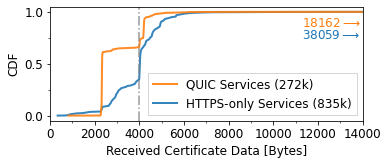

In [223]:
# pd.concat did produce non-monotonic dataframes, plot it one by one
ax = sr_cdf_certsize["HTTPS-only Services"].plot(figsize=(8*0.7,3*0.7), legend=True,
                                                    # marker=".", markersize=2, 
                                                    linewidth=2, logx=False, alpha=0.9)

sr_cdf_certsize["QUIC Services"].plot(ax=ax, legend=True,
                                      #marker=".", markersize=2, 
                                      linewidth=2, logx=False, alpha=0.9, )

ax.set_ylabel(f"CDF")
ax.set_xlabel("Received Certificate Data [Bytes]")

ax.axvline(4000, c="grey", linestyle="-.", alpha=0.8)

ax.set_xlim((0,14000))
ax.text(11300, 0.86, r"18162$\longrightarrow$", c="C1")
ax.text(11300, 0.74, r"38059$\longrightarrow$", c="C0")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],
         fancybox=False, shadow=False)

ax.xaxis.set_minor_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

fig = ax.get_figure()
fig.savefig(f"./plots/cdf_openssl_cert_bytes.pdf", bbox_inches='tight')
fig.savefig(f"./plots/cdf_openssl_cert_bytes.png", bbox_inches='tight', dpi=200)
plt.show()
plt.close(fig)

### Figure 7: Certificate chain sizes, depths and their dependency --> See next notebook.

# Figure 8: Mean sizes of certificate fields for QUIC domains

In [224]:
df_tls_quicservices = df_tls[ (df_tls["domain"].isin(set(df_quic["domain"]))) ].copy()
df_tls_quicservices["type_simple"] = df_tls_quicservices["type"].map(
                                        {"INTM":"Non-leaf",
                                         "ROOT":"Non-leaf",
                                         "LEAF":"Leaf",})

In [225]:
stack_cols = [
 'subjsize',
 'isssize',
 'pubkinfosize',
 'extssize',
 'sigsize',]

df_tls_quicservices["certsize_other"] = df_tls_quicservices["certsize"] - df_tls_quicservices[stack_cols].sum(axis=1)
stack_cols += ["certsize_other"]

In [226]:
# we need to sum here (and mean later), so that all thirdparty cert sizes are counted together!
# for owned type, this should be no different than first(), because only one value exists
tmp = df_tls_quicservices.groupby(["domain","type_simple"], as_index=False)[stack_cols].sum()

tmp["certsize_type"] = tmp["domain"].map(df_tls_quicservices.groupby(
                        ["domain"])["certsize_total"].first()>4000).map(
                            {True: ">4000", False: "≤4000"})

tmp.head()

,domain,type_simple,subjsize,isssize,pubkinfosize,extssize,sigsize,certsize_other,certsize_type
0,0-1xbet.best,Leaf,119,76,91,773,72,210,≤4000
1,0-1xbet.best,Non-leaf,76,92,91,273,256,189,≤4000
2,0-1xbet.club,Leaf,27,52,91,492,103,202,>4000
3,0-1xbet.club,Non-leaf,214,227,790,577,870,540,>4000
4,0-1xbet.info,Leaf,119,76,91,771,71,210,≤4000


In [227]:
to_plot = tmp.groupby(["certsize_type","type_simple"])[stack_cols].mean()

labels = {
    "subjsize": "Subject",
    "isssize": "Issuer",
    "pubkinfosize": "Subject Public Key Info",
    "extssize": "Total Extensions",
    "sigsize": "Signature",
    "certsize_other": "Other"
}
to_plot = to_plot.rename(columns=labels)
to_plot

Subject      Issuer  Subject Public Key Info  \
certsize_type type_simple                                                    
>4000         Leaf          31.121292   63.432484               198.154499   
              Non-leaf     194.316763  205.540071               817.021258   
≤4000         Leaf         111.753195   75.941857               106.183156   
              Non-leaf      78.296487   93.739191               123.448971   

                           Total Extensions   Signature       Other  
certsize_type type_simple                                            
>4000         Leaf               585.330391  180.523412  207.613209  
              Non-leaf           515.701518  818.917218  458.209993  
≤4000         Leaf               762.402101   86.930325  210.211005  
              Non-leaf           275.195223  275.344464  194.036684

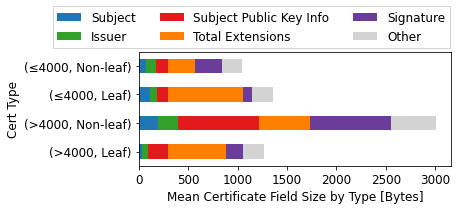

In [228]:
ax = to_plot.plot.barh(
        stacked=True, figsize=(8*0.7,3*0.7),
        color=[cmap_paired(0.1), cmap_paired(0.3), cmap_paired(0.45),
               cmap_paired(0.6), cmap_paired(0.75), "lightgrey"],)

ax.legend(loc='upper center', bbox_to_anchor=(0.36, 1.45),
          ncol=3, fancybox=False, shadow=False)

ax.set_ylabel(f"Cert Type")
ax.set_xlabel("Mean Certificate Field Size by Type [Bytes]")

fig = ax.get_figure()
fig.savefig(f"./plots/barh_openssl_cert_bytes_types.pdf", bbox_inches='tight')
fig.savefig(f"./plots/barh_openssl_cert_bytes_types.png", bbox_inches='tight', dpi=200)
plt.show()
plt.close(fig)

# Verification: QUIC Certs vs TCP/HTTPS Certs

In [278]:
# LEAF is first hash
df_qscanner_leafs = df_qscanner.drop_duplicates(subset=["hostname"], keep="first")
df_qscanner_leafs

,hostname,certificateHashes
0,slotv-online.xyz,9556295934cfe04c2505bbdbe8500a662c5b1056175893...
1,multilotto.com,c5afb3820d93b2dc12750c63a680ae76a63a1c46eec958...
2,1xbet-new.ru,12571197245ee35dff7af19db47226ae5ef5d2ef04e6b8...
3,pinterest.vn,8b54c984af414728957594d4bb0b0dc0374362de6e2005...
4,www.readbakery.com,9b2de7ba0b14e84635d1f6005f71cdef75a8d38620f5b5...
...,...,...
271169,www.kusadasibest.com,56b9599f6235d3f7f2e6ca0c98509aef52f0924be6cffd...
271170,currencyconverterapi.com,f2c506d62e6eb1810c8cc694764d4357821352a78c2b26...
271171,uk.innovaccer.com,f10abc5d8c94380cb6391c8e4741333d38501255d05415...
271172,riobet-com.club,4a428f3508b6dc5133c76a25ba99e99df4cddfe0e545af...


In [279]:
df_tls_quicleafs = df_tls[ (df_tls["type"]=="LEAF") &
                       (df_tls["domain"].isin(
                            df_qscanner_leafs["hostname"]))].copy()

In [280]:
df_tls_quicleafs["hash.quic"] = df_tls_quicleafs["domain"].map(
                                    df_qscanner_leafs.set_index(
                                        "hostname")["certificateHashes"].to_dict())

In [281]:
df_tls_quicleafs[["domain","hash","hash.quic"]].head()

,domain,hash,hash.quic
5,0-1xbet.best,6a251e976d17386cd68ee077e643e8105324fc6d5785af...,6a251e976d17386cd68ee077e643e8105324fc6d5785af...
9,0-1xbet.club,08d2ff60ee4993431d2d268d7083b1a04a8dd256586b02...,08d2ff60ee4993431d2d268d7083b1a04a8dd256586b02...
11,0-1xbet.info,1fbe02e4535544b8f1e58af56d863511993a453edbbb39...,1fbe02e4535544b8f1e58af56d863511993a453edbbb39...
13,0-1xbet.top,f0b38a68432319bb51787c2188c6250d513bb056fc5fd7...,f0b38a68432319bb51787c2188c6250d513bb056fc5fd7...
15,0-1xbet.xyz,ee7aa4511974717cc2bee04002c908f6564e4648da50e3...,ee7aa4511974717cc2bee04002c908f6564e4648da50e3...


In [282]:
# same certs for TCP/TLS and QUIC in ~97% of domains! only 9k different names
(df_tls_quicleafs["hash"]==df_tls_quicleafs["hash.quic"]).value_counts(normalize=True)*100

True     96.678761
False     3.321239
dtype: float64

In [283]:
# very similar results if we do this analysis for unique certs
#df_tls_quicleafs["hash"].drop_duplicates().isin(
#    df_tls_quicleafs["hash.quic"].unique()).value_counts(normalize=True)

In [284]:
# df_tls_quicleafs[(df_tls_quicleafs["hash"]!=df_tls_quicleafs["hash.quic"])]["domain"].sample(5)

In [285]:
# df_tls_quicleafs[(df_tls_quicleafs["hash"]!=df_tls_quicleafs["hash.quic"])]["domain"].to_csv(
#    "quicnames_tls_other_certhashes.csv.zst", index=False, header=None)

# Table 2: Relative ratio of crypto algorithms and key lengths 

In [236]:
df_tls["type_simple"] = df_tls["type"].map(
                            {"INTM":"Non-leaf",
                             "ROOT":"Non-leaf",
                             "LEAF":"Leaf",})

df_tls["is_quic_domain"] = df_tls["domain"].isin(df_quic["domain"])

In [237]:
tmp = df_tls.groupby(["is_quic_domain","type_simple"])[
        ["keyalg","keybits"]].value_counts(normalize=True)*100
tmp = tmp[tmp>1]
tmp = tmp.unstack(level=[-2,-1]).reindex(
    [(True,"Non-leaf"),  (True,"Leaf"),
     (False,"Non-leaf"), (False,"Leaf"),]
).round(1).fillna("n/a")

tmp

keyalg                       RSA       ECDSA      
keybits                     2048  4096  256   384 
is_quic_domain type_simple                        
True           Non-leaf     15.1  22.4  40.4  22.1
               Leaf         19.2   1.4  78.9   n/a
False          Non-leaf     63.3  32.1   2.7   1.6
               Leaf         81.4   8.1   7.8   1.9